<h1 style="color:red">Import data from mongo</h1>

In [1]:
import pymongo
import pandas as pd
from pymongo import MongoClient
import numpy as np
client = MongoClient()
db = client.movies
collection = db.movies
data = pd.DataFrame(list(collection.find()))
numberOfMovies = data.shape[0]
numberOfFeatures = data.shape[1] - 2

In [2]:
del data['_id']
data.head(numberOfMovies)

,averageRain,averageSnow,averageTemp,budget,capital,daysInTheater,emoji_count,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query,query_length,retweets,theater_count,tweets
0,0.211250,0.00,60.500,44.0,0.119949,3,0.002353,1.845403,24710273.0,0,0.009873,0.014885,0.036564,0.040492,0.024308,#TheAccountant,13,10957,3332.0,16708
1,0.211250,0.00,60.500,10.0,0.152754,3,0.002137,0.810219,2182216.0,0,0.029627,0.013817,0.026907,0.018868,0.023416,#MaxSteel,8,1301,2034.0,1781
2,0.211250,0.00,60.500,9.9,0.146663,3,0.005497,2.458964,11767210.0,0,0.015356,0.015272,0.014558,0.026568,0.029027,#KevinHartWhatNow,16,14787,2567.0,18045
3,0.211250,0.00,60.500,0.0,0.115891,3,0.004280,2.591795,707021.0,1,0.002734,0.004493,0.049037,0.041449,0.024302,#PricelessTheMovie,17,511,303.0,975
4,0.311250,0.00,63.625,20.0,0.137538,3,0.024375,2.371755,28501448.0,0,0.008981,0.015667,0.018103,0.032449,0.023182,#MadeaHalloween,14,9847,2260.0,12710
5,0.311250,0.00,63.625,60.0,0.144194,3,0.004524,2.181918,22872490.0,1,0.003757,0.006916,0.058994,0.034975,0.022419,#JackReacherMovie,16,8783,3780.0,10032
6,0.311250,0.00,63.625,9.0,0.123995,3,0.007021,0.787846,14065500.0,1,0.010599,0.008265,0.023189,0.020216,0.022276,#OuijaMovie,10,12413,3167.0,29983
7,0.311250,0.00,63.625,40.0,0.153027,3,0.002289,2.365276,5461475.0,0,0.010492,0.012986,0.019934,0.019645,0.020465,#KeepingUpWithTheJoneses,23,2638,3022.0,3882
8,0.111250,0.00,59.000,75.0,0.116394,3,0.001504,1.616158,14860425.0,1,0.008232,0.016870,0.049257,0.034024,0.020848,#InfernoMovie,12,7215,3576.0,9444
9,0.111250,0.00,59.000,0.0,0.151591,3,0.000219,1.344280,44725.0,0,0.016290,0.016057,0.008255,0.022405,0.020482,#GimmeDanger,11,759,3.0,944


<h1 style="color:blue">Make table readable</h1>

In [3]:
query = data['query']
data.drop(labels=['query'], axis=1, inplace=True)
data.insert(0, 'query', query)
tweets = data['tweets']
data.drop(labels=['tweets'], axis=1, inplace=True)
data.insert(1, 'tweets', tweets)
retweets = data['retweets']
data.drop(labels=['retweets'], axis=1, inplace=True)
data.insert(2, 'retweets', retweets)
theater_count = data['theater_count']
data.drop(labels=['theater_count'], axis=1, inplace=True)
data.insert(3, 'theater_count', theater_count)
#punctuation = data['punctuation']
#data.drop(labels=['punctuation'], axis=1, inplace=True)
#data.insert(4, 'punctuation', punctuation)
data.head(numberOfMovies)

,query,tweets,retweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,daysInTheater,emoji_count,favorites_per_tweet,gross,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length
0,#TheAccountant,16708,10957,3332.0,0.211250,0.00,60.500,44.0,0.119949,3,0.002353,1.845403,24710273.0,0,0.009873,0.014885,0.036564,0.040492,0.024308,13
1,#MaxSteel,1781,1301,2034.0,0.211250,0.00,60.500,10.0,0.152754,3,0.002137,0.810219,2182216.0,0,0.029627,0.013817,0.026907,0.018868,0.023416,8
2,#KevinHartWhatNow,18045,14787,2567.0,0.211250,0.00,60.500,9.9,0.146663,3,0.005497,2.458964,11767210.0,0,0.015356,0.015272,0.014558,0.026568,0.029027,16
3,#PricelessTheMovie,975,511,303.0,0.211250,0.00,60.500,0.0,0.115891,3,0.004280,2.591795,707021.0,1,0.002734,0.004493,0.049037,0.041449,0.024302,17
4,#MadeaHalloween,12710,9847,2260.0,0.311250,0.00,63.625,20.0,0.137538,3,0.024375,2.371755,28501448.0,0,0.008981,0.015667,0.018103,0.032449,0.023182,14
5,#JackReacherMovie,10032,8783,3780.0,0.311250,0.00,63.625,60.0,0.144194,3,0.004524,2.181918,22872490.0,1,0.003757,0.006916,0.058994,0.034975,0.022419,16
6,#OuijaMovie,29983,12413,3167.0,0.311250,0.00,63.625,9.0,0.123995,3,0.007021,0.787846,14065500.0,1,0.010599,0.008265,0.023189,0.020216,0.022276,10
7,#KeepingUpWithTheJoneses,3882,2638,3022.0,0.311250,0.00,63.625,40.0,0.153027,3,0.002289,2.365276,5461475.0,0,0.010492,0.012986,0.019934,0.019645,0.020465,23
8,#InfernoMovie,9444,7215,3576.0,0.111250,0.00,59.000,75.0,0.116394,3,0.001504,1.616158,14860425.0,1,0.008232,0.016870,0.049257,0.034024,0.020848,12
9,#GimmeDanger,944,759,3.0,0.111250,0.00,59.000,0.0,0.151591,3,0.000219,1.344280,44725.0,0,0.016290,0.016057,0.008255,0.022405,0.020482,11


In [4]:
gross = data['gross']
data.drop(labels=['gross'], axis=1, inplace=True)
data.insert(numberOfFeatures, 'gross', gross)
data.head(numberOfMovies)

,query,tweets,retweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,daysInTheater,emoji_count,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,gross
0,#TheAccountant,16708,10957,3332.0,0.211250,0.00,60.500,44.0,0.119949,3,0.002353,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,24710273.0
1,#MaxSteel,1781,1301,2034.0,0.211250,0.00,60.500,10.0,0.152754,3,0.002137,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2182216.0
2,#KevinHartWhatNow,18045,14787,2567.0,0.211250,0.00,60.500,9.9,0.146663,3,0.005497,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,11767210.0
3,#PricelessTheMovie,975,511,303.0,0.211250,0.00,60.500,0.0,0.115891,3,0.004280,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,707021.0
4,#MadeaHalloween,12710,9847,2260.0,0.311250,0.00,63.625,20.0,0.137538,3,0.024375,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,28501448.0
5,#JackReacherMovie,10032,8783,3780.0,0.311250,0.00,63.625,60.0,0.144194,3,0.004524,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,22872490.0
6,#OuijaMovie,29983,12413,3167.0,0.311250,0.00,63.625,9.0,0.123995,3,0.007021,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,14065500.0
7,#KeepingUpWithTheJoneses,3882,2638,3022.0,0.311250,0.00,63.625,40.0,0.153027,3,0.002289,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,5461475.0
8,#InfernoMovie,9444,7215,3576.0,0.111250,0.00,59.000,75.0,0.116394,3,0.001504,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,14860425.0
9,#GimmeDanger,944,759,3.0,0.111250,0.00,59.000,0.0,0.151591,3,0.000219,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,44725.0


In [5]:
data['grossPerDay'] = data.gross/data.daysInTheater
data.head(numberOfMovies)

,query,tweets,retweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,daysInTheater,...,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,gross,grossPerDay
0,#TheAccountant,16708,10957,3332.0,0.211250,0.00,60.500,44.0,0.119949,3,...,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,24710273.0,8.236758e+06
1,#MaxSteel,1781,1301,2034.0,0.211250,0.00,60.500,10.0,0.152754,3,...,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2182216.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,2567.0,0.211250,0.00,60.500,9.9,0.146663,3,...,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,11767210.0,3.922403e+06
3,#PricelessTheMovie,975,511,303.0,0.211250,0.00,60.500,0.0,0.115891,3,...,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,707021.0,2.356737e+05
4,#MadeaHalloween,12710,9847,2260.0,0.311250,0.00,63.625,20.0,0.137538,3,...,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,28501448.0,9.500483e+06
5,#JackReacherMovie,10032,8783,3780.0,0.311250,0.00,63.625,60.0,0.144194,3,...,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,22872490.0,7.624163e+06
6,#OuijaMovie,29983,12413,3167.0,0.311250,0.00,63.625,9.0,0.123995,3,...,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,14065500.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,3022.0,0.311250,0.00,63.625,40.0,0.153027,3,...,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,5461475.0,1.820492e+06
8,#InfernoMovie,9444,7215,3576.0,0.111250,0.00,59.000,75.0,0.116394,3,...,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,14860425.0,4.953475e+06
9,#GimmeDanger,944,759,3.0,0.111250,0.00,59.000,0.0,0.151591,3,...,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,44725.0,1.490833e+04


<h2>Plotting</h2>

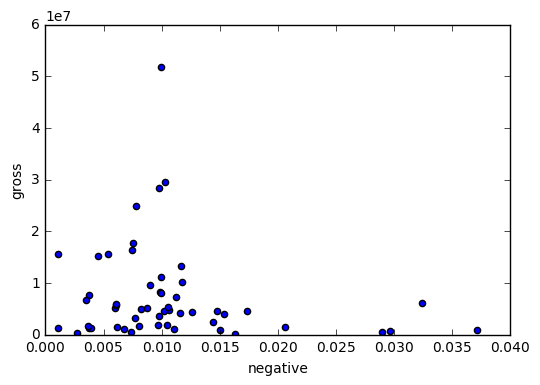

In [6]:
import matplotlib.pyplot as plt
plt.ylabel('gross')
plt.xlabel('negative')
plt.axis([0, 0.04, 0, 60000000])
plt.scatter(data['negative'], data['grossPerDay'])
plt.show()

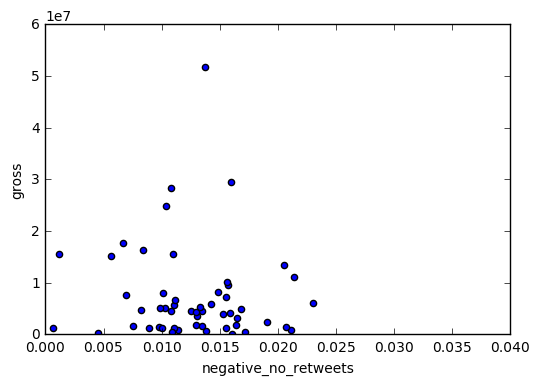

In [7]:
plt.ylabel('gross')
plt.xlabel('negative_no_retweets')
plt.axis([0, 0.04, 0, 60000000])
plt.scatter(data['negative_no_retweets'], data['grossPerDay'])
plt.show()

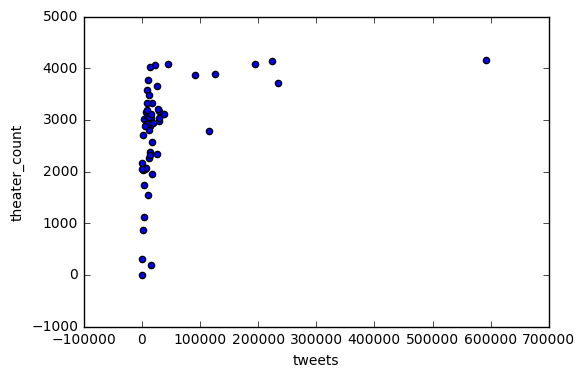

In [8]:

plt.ylabel('theater_count')
plt.xlabel('tweets')
#plt.axis([0, 0.07, 0, 60000000])
plt.scatter(data['tweets'], data['theater_count'])
plt.show()

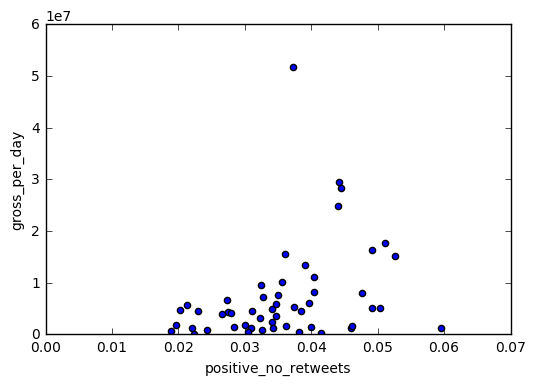

In [9]:
plt.ylabel('gross_per_day')
plt.xlabel('positive_no_retweets')
plt.axis([0, 0.07, 0, 60000000])
plt.scatter(data['positive_no_retweets'], data['grossPerDay'])
plt.show()

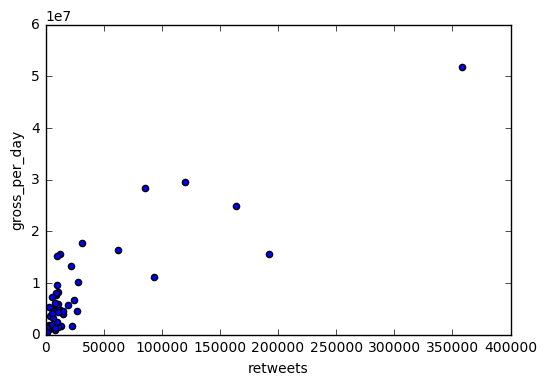

In [10]:
plt.ylabel('gross_per_day')
plt.xlabel('retweets')
plt.axis([0, 400000, 0, 60000000])
plt.scatter(data['retweets'], data['grossPerDay'])
plt.show()

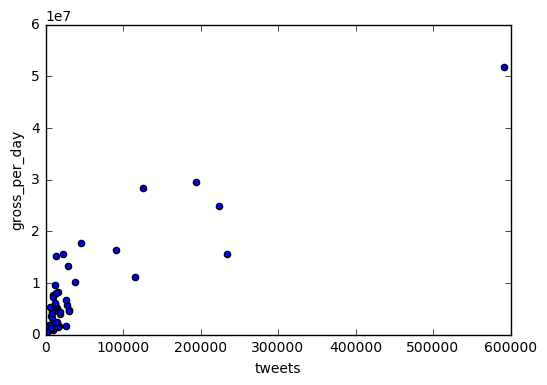

In [11]:
plt.ylabel('gross_per_day')
plt.xlabel('tweets')
plt.axis([0, 600000, 0, 60000000])
plt.scatter(data['tweets'], data['grossPerDay'])
plt.show()

In [12]:
data['percentretweets'] = data.retweets/data.tweets
data.head(numberOfMovies)

,query,tweets,retweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,daysInTheater,...,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,gross,grossPerDay,percentretweets
0,#TheAccountant,16708,10957,3332.0,0.211250,0.00,60.500,44.0,0.119949,3,...,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,24710273.0,8.236758e+06,0.655794
1,#MaxSteel,1781,1301,2034.0,0.211250,0.00,60.500,10.0,0.152754,3,...,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2182216.0,7.274053e+05,0.730488
2,#KevinHartWhatNow,18045,14787,2567.0,0.211250,0.00,60.500,9.9,0.146663,3,...,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,11767210.0,3.922403e+06,0.819451
3,#PricelessTheMovie,975,511,303.0,0.211250,0.00,60.500,0.0,0.115891,3,...,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,707021.0,2.356737e+05,0.524103
4,#MadeaHalloween,12710,9847,2260.0,0.311250,0.00,63.625,20.0,0.137538,3,...,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,28501448.0,9.500483e+06,0.774744
5,#JackReacherMovie,10032,8783,3780.0,0.311250,0.00,63.625,60.0,0.144194,3,...,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,22872490.0,7.624163e+06,0.875498
6,#OuijaMovie,29983,12413,3167.0,0.311250,0.00,63.625,9.0,0.123995,3,...,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,14065500.0,4.688500e+06,0.414001
7,#KeepingUpWithTheJoneses,3882,2638,3022.0,0.311250,0.00,63.625,40.0,0.153027,3,...,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,5461475.0,1.820492e+06,0.679547
8,#InfernoMovie,9444,7215,3576.0,0.111250,0.00,59.000,75.0,0.116394,3,...,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,14860425.0,4.953475e+06,0.763977
9,#GimmeDanger,944,759,3.0,0.111250,0.00,59.000,0.0,0.151591,3,...,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,44725.0,1.490833e+04,0.804025


In [13]:
percentretweets = data['percentretweets']
data.drop(labels=['percentretweets'], axis=1, inplace=True)
data.insert(3, 'percentretweets', percentretweets)
#del data['gross']
#del data['daysInTheater']
data.head(numberOfMovies)

,query,tweets,retweets,percentretweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,...,favorites_per_tweet,movie_in_query,negative,negative_no_retweets,positive,positive_no_retweets,punctuation,query_length,gross,grossPerDay
0,#TheAccountant,16708,10957,0.655794,3332.0,0.211250,0.00,60.500,44.0,0.119949,...,1.845403,0,0.009873,0.014885,0.036564,0.040492,0.024308,13,24710273.0,8.236758e+06
1,#MaxSteel,1781,1301,0.730488,2034.0,0.211250,0.00,60.500,10.0,0.152754,...,0.810219,0,0.029627,0.013817,0.026907,0.018868,0.023416,8,2182216.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,0.819451,2567.0,0.211250,0.00,60.500,9.9,0.146663,...,2.458964,0,0.015356,0.015272,0.014558,0.026568,0.029027,16,11767210.0,3.922403e+06
3,#PricelessTheMovie,975,511,0.524103,303.0,0.211250,0.00,60.500,0.0,0.115891,...,2.591795,1,0.002734,0.004493,0.049037,0.041449,0.024302,17,707021.0,2.356737e+05
4,#MadeaHalloween,12710,9847,0.774744,2260.0,0.311250,0.00,63.625,20.0,0.137538,...,2.371755,0,0.008981,0.015667,0.018103,0.032449,0.023182,14,28501448.0,9.500483e+06
5,#JackReacherMovie,10032,8783,0.875498,3780.0,0.311250,0.00,63.625,60.0,0.144194,...,2.181918,1,0.003757,0.006916,0.058994,0.034975,0.022419,16,22872490.0,7.624163e+06
6,#OuijaMovie,29983,12413,0.414001,3167.0,0.311250,0.00,63.625,9.0,0.123995,...,0.787846,1,0.010599,0.008265,0.023189,0.020216,0.022276,10,14065500.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,3022.0,0.311250,0.00,63.625,40.0,0.153027,...,2.365276,0,0.010492,0.012986,0.019934,0.019645,0.020465,23,5461475.0,1.820492e+06
8,#InfernoMovie,9444,7215,0.763977,3576.0,0.111250,0.00,59.000,75.0,0.116394,...,1.616158,1,0.008232,0.016870,0.049257,0.034024,0.020848,12,14860425.0,4.953475e+06
9,#GimmeDanger,944,759,0.804025,3.0,0.111250,0.00,59.000,0.0,0.151591,...,1.344280,0,0.016290,0.016057,0.008255,0.022405,0.020482,11,44725.0,1.490833e+04


In [14]:
#data.drop(data.index[[41]], inplace=True)
#data.tail()

<h1 style="color:red">Add Complexity</h1>

In [15]:
data['square_tweets'] = data.tweets**2
data['square_retweets'] = data.retweets**2
data['square_positive'] = data.positive**2
data['square_negative'] = data.negative**2
data['square_positive_no_retweets'] = data.positive_no_retweets**2
data['square_negative_no_retweets'] = data.negative_no_retweets**2
data['square_percentretweets'] = data.percentretweets**2
data['square_capital'] = data.capital**2
data['square_punctuation'] = data.punctuation**2
data['square_emoji_count'] = data.emoji_count**2
data['square_favorites_per_tweet'] = data.favorites_per_tweet**2
data['square_days_in_theater'] = data.daysInTheater**2
data['square_movie_in_query'] = data.movie_in_query**2
data['square_budget'] = data.budget**2

data['ab'] = data.tweets*data.retweets
data['ac'] = data.tweets*data.capital
data['ad'] = data.tweets*data.emoji_count
data['ae'] = data.tweets*data.favorites_per_tweet
data['af'] = data.tweets*data.negative
data['ag'] = data.tweets*data.negative_no_retweets
data['ah'] = data.tweets*data.positive
data['ai'] = data.tweets*data.positive_no_retweets
data['aj'] = data.tweets*data.punctuation
data['bc'] = data.retweets*data.capital
data['bd'] = data.retweets*data.emoji_count
data['be'] = data.retweets*data.favorites_per_tweet
data['bf'] = data.retweets*data.negative
data['bg'] = data.retweets*data.negative_no_retweets
data['bh'] = data.retweets*data.positive
data['bi'] = data.retweets*data.positive_no_retweets
data['bj'] = data.retweets*data.punctuation
data['cd'] = data.capital*data.emoji_count
data['ce'] = data.capital*data.favorites_per_tweet
data['cf'] = data.capital*data.negative
data['cg'] = data.capital*data.negative_no_retweets
data['ch'] = data.capital*data.positive
data['ci'] = data.capital*data.positive_no_retweets
data['cj'] = data.capital*data.punctuation
data['de'] = data.emoji_count*data.favorites_per_tweet
data['df'] = data.emoji_count*data.negative
data['dg'] = data.emoji_count*data.negative_no_retweets
data['dh'] = data.emoji_count*data.positive
data['di'] = data.emoji_count*data.positive_no_retweets
data['dj'] = data.emoji_count*data.punctuation
data['ef'] = data.favorites_per_tweet*data.negative
data['eg'] = data.favorites_per_tweet*data.negative_no_retweets
data['eh'] = data.favorites_per_tweet*data.positive
data['ei'] = data.favorites_per_tweet*data.positive_no_retweets
data['ej'] = data.favorites_per_tweet*data.punctuation
data['fg'] = data.negative*data.negative_no_retweets
data['fh'] = data.negative*data.positive
data['fi'] = data.negative*data.positive_no_retweets
data['fj'] = data.negative*data.punctuation
data['gh'] = data.negative_no_retweets*data.positive
data['gi'] = data.negative_no_retweets*data.positive_no_retweets
data['gj'] = data.negative_no_retweets*data.punctuation
data['hi'] = data.positive*data.positive_no_retweets
data['hj'] = data.positive*data.punctuation
data['ij'] = data.positive_no_retweets*data.punctuation
data['ak'] = data.tweets*data.theater_count
data['bk'] = data.retweets*data.theater_count
data['ck'] = data.capital*data.theater_count
data['dk'] = data.emoji_count*data.theater_count
data['ek'] = data.favorites_per_tweet*data.theater_count
data['fk'] = data.negative*data.theater_count
data['gk'] = data.negative_no_retweets*data.theater_count
data['hk'] = data.positive*data.theater_count
data['ik'] = data.positive_no_retweets*data.theater_count
data['jk'] = data.punctuation*data.theater_count
data['al'] = data.tweets*data.daysInTheater
data['bl'] = data.retweets*data.daysInTheater
data['cl'] = data.capital*data.daysInTheater
data['dl'] = data.emoji_count*data.daysInTheater
data['el'] = data.favorites_per_tweet*data.daysInTheater
data['fl'] = data.negative*data.daysInTheater
data['gl'] = data.negative_no_retweets*data.daysInTheater
data['hl'] = data.positive*data.daysInTheater
data['il'] = data.positive_no_retweets*data.daysInTheater
data['jl'] = data.punctuation*data.daysInTheater
data['kl'] = data.theater_count*data.daysInTheater
data['am'] = data.tweets*data.averageTemp
data['bm'] = data.retweets*data.averageTemp
data['cm'] = data.capital*data.averageTemp
data['dm'] = data.emoji_count*data.averageTemp
data['em'] = data.favorites_per_tweet*data.averageTemp
data['fm'] = data.negative*data.averageTemp
data['gm'] = data.negative_no_retweets*data.averageTemp
data['hm'] = data.positive*data.averageTemp
data['im'] = data.positive_no_retweets*data.averageTemp
data['jm'] = data.punctuation*data.averageTemp
data['km'] = data.theater_count*data.averageTemp
data['lm'] = data.daysInTheater*data.averageTemp
data['an'] = data.tweets*data.averageRain
data['bn'] = data.retweets*data.averageRain
data['cn'] = data.capital*data.averageRain
data['dn'] = data.emoji_count*data.averageRain
data['en'] = data.favorites_per_tweet*data.averageRain
data['fn'] = data.negative*data.averageRain
data['gn'] = data.negative_no_retweets*data.averageRain
data['hn'] = data.positive*data.averageRain
data['in'] = data.positive_no_retweets*data.averageRain
data['jn'] = data.punctuation*data.averageRain
data['kn'] = data.theater_count*data.averageRain
data['ln'] = data.daysInTheater*data.averageRain
data['mn'] = data.averageTemp*data.averageRain
data['ao'] = data.tweets*data.averageSnow
data['bo'] = data.retweets*data.averageSnow
data['co'] = data.capital*data.averageSnow
data['do'] = data.emoji_count*data.averageSnow
data['eo'] = data.favorites_per_tweet*data.averageSnow
data['fo'] = data.negative*data.averageSnow
data['go'] = data.negative_no_retweets*data.averageSnow
data['ho'] = data.positive*data.averageSnow
data['io'] = data.positive_no_retweets*data.averageSnow
data['jo'] = data.punctuation*data.averageSnow
data['ko'] = data.theater_count*data.averageSnow
data['lo'] = data.daysInTheater*data.averageSnow
data['mo'] = data.averageTemp*data.averageSnow
data['no'] = data.averageRain*data.averageSnow
data['ap'] = data.tweets*data.movie_in_query
data['bp'] = data.retweets*data.movie_in_query
data['cp'] = data.capital*data.movie_in_query
data['dp'] = data.emoji_count*data.movie_in_query
data['ep'] = data.favorites_per_tweet*data.movie_in_query
data['fp'] = data.negative*data.movie_in_query
data['gp'] = data.negative_no_retweets*data.movie_in_query
data['hp'] = data.positive*data.movie_in_query
data['ip'] = data.positive_no_retweets*data.movie_in_query
data['jp'] = data.punctuation*data.movie_in_query
data['kp'] = data.theater_count*data.movie_in_query
data['lp'] = data.daysInTheater*data.movie_in_query
data['mp'] = data.averageTemp*data.movie_in_query
data['np'] = data.averageRain*data.movie_in_query
data['op'] = data.averageSnow*data.movie_in_query
data['aq'] = data.tweets*data.budget
data['bq'] = data.retweets*data.budget
data['cq'] = data.capital*data.budget
data['dq'] = data.emoji_count*data.budget
data['eq'] = data.favorites_per_tweet*data.budget
data['fq'] = data.negative*data.budget
data['gq'] = data.negative_no_retweets*data.budget
data['hq'] = data.positive*data.budget
data['iq'] = data.positive_no_retweets*data.budget
data['jq'] = data.punctuation*data.budget
data['kq'] = data.theater_count*data.budget
data['lq'] = data.daysInTheater*data.budget
data['mq'] = data.averageTemp*data.budget
data['nq'] = data.averageRain*data.budget
data['oq'] = data.averageSnow*data.budget
data['pq'] = data.movie_in_query*data.budget

del data['gross']
grossPerDay = data['grossPerDay']
data.drop(labels=['grossPerDay'], axis=1, inplace=True)
data.insert(data.shape[1], 'grossPerDay', grossPerDay)
data.head(numberOfMovies)

,query,tweets,retweets,percentretweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,...,hq,iq,jq,kq,lq,mq,nq,oq,pq,grossPerDay
0,#TheAccountant,16708,10957,0.655794,3332.0,0.211250,0.00,60.500,44.0,0.119949,...,1.608824,1.781644,1.069553,146608.0,132.0,2662.000,9.295000,0.00,0.0,8.236758e+06
1,#MaxSteel,1781,1301,0.730488,2034.0,0.211250,0.00,60.500,10.0,0.152754,...,0.269071,0.188679,0.234159,20340.0,30.0,605.000,2.112500,0.00,0.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,0.819451,2567.0,0.211250,0.00,60.500,9.9,0.146663,...,0.144127,0.263022,0.287363,25413.3,29.7,598.950,2.091375,0.00,0.0,3.922403e+06
3,#PricelessTheMovie,975,511,0.524103,303.0,0.211250,0.00,60.500,0.0,0.115891,...,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.00,0.0,2.356737e+05
4,#MadeaHalloween,12710,9847,0.774744,2260.0,0.311250,0.00,63.625,20.0,0.137538,...,0.362067,0.648971,0.463644,45200.0,60.0,1272.500,6.225000,0.00,0.0,9.500483e+06
5,#JackReacherMovie,10032,8783,0.875498,3780.0,0.311250,0.00,63.625,60.0,0.144194,...,3.539669,2.098520,1.345147,226800.0,180.0,3817.500,18.675000,0.00,60.0,7.624163e+06
6,#OuijaMovie,29983,12413,0.414001,3167.0,0.311250,0.00,63.625,9.0,0.123995,...,0.208704,0.181945,0.200486,28503.0,27.0,572.625,2.801250,0.00,9.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,3022.0,0.311250,0.00,63.625,40.0,0.153027,...,0.797355,0.785781,0.818607,120880.0,120.0,2545.000,12.450000,0.00,0.0,1.820492e+06
8,#InfernoMovie,9444,7215,0.763977,3576.0,0.111250,0.00,59.000,75.0,0.116394,...,3.694252,2.551775,1.563595,268200.0,225.0,4425.000,8.343750,0.00,75.0,4.953475e+06
9,#GimmeDanger,944,759,0.804025,3.0,0.111250,0.00,59.000,0.0,0.151591,...,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.00,0.0,1.490833e+04


In [16]:
#data = data[data.grossPerDay<20000000]
#data = data[data.grossPerDay>5000000]
#print len(data)
print data.grossPerDay.mean()

7423045.54717


<h1 style="color:orange">Sklearn Stuff</h1>

<h1 style="color:red">Linear Regression</h1>

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn import metrics

total_data = data.values

f_col = ['tweets', 'retweets', 'daysInTheater', 'budget', 'capital', 'punctuation', 'emoji_count', 'favorites_per_tweet', 'movie_in_query', 'averageTemp', 'averageRain', 'averageSnow',
        'square_tweets', 'square_retweets', 'square_days_in_theater', 'square_budget', 'square_capital', 'square_emoji_count', 'square_favorites_per_tweet', 'square_emoji_count', 'square_movie_in_query', 'square_positive', 'square_positive_no_retweets', 'square_negative', 'square_negative_no_retweets',
        'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 
        'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq',
        'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq',
        'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dp', 'dq',
        'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq',
        'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq',
        'gh', 'gi', 'gj', 'gk', 'gl', 'gm', 'gn', 'go', 'gp', 'gq',
        'hi', 'hj', 'hk', 'hl', 'hm', 'hn', 'ho', 'hp', 'hq',
        'ij', 'ik', 'il', 'im', 'in', 'io', 'ip', 'iq',
        'jk', 'jl', 'jm', 'jn', 'jo', 'jp', 'jq',
        'kl', 'km', 'kn', 'ko', 'kp', 'kq',
        'lm', 'ln', 'lo', 'lp', 'lq',
        'mn', 'mo', 'mp', 'mq',
        'no', 'np', 'nq',
        'op', 'oq',
        'pq']
'''
data.to_csv(path_or_buf='/Users/steveshim/Downloads/movies.csv', sep=',')
f_col = ['theater_count', 'budget', 'square_percentretweets', 'ai', 'hk', 'ik', 'jk', 'em', 'gm', 
         'im', 'mn', 'cq', 'eq', 'hq', 'iq', 'jq', 'lq']
'''
X = data[f_col]
y = data[['grossPerDay']]
#data_to_scale = total_data[:,:12]
#print(X.head())
scaled_X = preprocessing.scale(X)
#print(scaled_X)

#X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=0)


# testing on traning set:
X_train = scaled_X
y_train = y
X_test = scaled_X
y_test = y

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print (clf.intercept_)
print (clf.coef_)
print np.sqrt(((y_test-y_pred)**2).mean())

[ 7423045.54716981]
[[ 1015847.5921335    115124.84462538  -399115.73873323   533958.46786568
    383341.65841355   500907.43075339  -526087.21411594  -401979.2429428
    -11488.2160089    436548.82511679  -378502.70956997   -42231.65120104
   -421708.58820911 -1324727.48851151  -399115.73873324   105225.91942217
    206032.49397616   815200.56330488  1548337.14261547   815200.56330488
    -11488.21600888  -524700.96354307   189423.77098778  -139446.53430123
    377567.17004193  -829710.82086395  1489825.05470727   308816.7270901
  -1407510.83042214  1568118.33180176  1292052.97922818   836230.96092738
   1068694.72785264  1773790.48515179   773264.12259069  1076696.87500329
    769872.97903712  -502032.11865091   283803.56732965  -332515.90989643
   -114630.94051333   695126.55168983  -333373.83591352 -2438982.87867402
    592104.69581097   339248.90699779  -108002.22596519    85645.20818201
   1002692.71905617   -37139.57162825   195096.14521832  -469059.91412063
   -900502.59772507 

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to

<h1 style="color:red">Feature Selection</h1>

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
#from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE

X_new = SelectKBest(f_regression, k=1).fit_transform(scaled_X, y)
print scaled_X.shape
print X_new.shape
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=0)
X_test = X_train
y_test = y_train

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print (clf.intercept_)
print (clf.coef_)
print np.sqrt(((y_test-y_pred)**2).mean())

(53, 161)
(53, 1)
[ 7213586.76585829]
[[ 8379205.94018316]]
grossPerDay    4.029848e+06
dtype: float64


/usr/local/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<h1 style="color:red">Logistic Regression</h1>

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
'''
def split_gross_categories(value):
    if value < 1000000:
        return 0
    elif value < 3000000:
        return 1
    elif value < 10000000:
        return 2
    else:
        return 3

data['grossByCategory'] = 0

f=lambda x: split_gross_categories(x)
data.grossByCategory = data.grossPerDay.map(f)
#data.head(numberOfMovies)



yLogistic = data[['grossByCategory']]

clfLogistic = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_new, yLogistic, test_size=0.1, random_state=0)
clfLogistic.fit(X_train, y_train)
output = clfLogistic.predict(X_test)
print metrics.accuracy_score(y_test, output)
print clfLogistic.predict(X_test)
print y_test
'''

"\ndef split_gross_categories(value):\n    if value < 1000000:\n        return 0\n    elif value < 3000000:\n        return 1\n    elif value < 10000000:\n        return 2\n    else:\n        return 3\n\ndata['grossByCategory'] = 0\n\nf=lambda x: split_gross_categories(x)\ndata.grossByCategory = data.grossPerDay.map(f)\n#data.head(numberOfMovies)\n\n\n\nyLogistic = data[['grossByCategory']]\n\nclfLogistic = LogisticRegression()\nX_train, X_test, y_train, y_test = train_test_split(X_new, yLogistic, test_size=0.1, random_state=0)\nclfLogistic.fit(X_train, y_train)\noutput = clfLogistic.predict(X_test)\nprint metrics.accuracy_score(y_test, output)\nprint clfLogistic.predict(X_test)\nprint y_test\n"

<h1 style="color:red">Cross Validation</h1>

In [20]:
from sklearn.cross_validation import cross_val_score
import numpy as np
'''
f_col = ['averageTemp', 'tweets', 'retweets', 'square_emoji_count', 'square_positive_no_retweets',
         'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'am', 
         'bd', 'bh', 'bj', 'bl', 'bm', 'bk']
'''
f_col = ['ai', 'ik']
X = data[f_col]
y = data[['grossPerDay']]
scaled_X = preprocessing.scale(X)
my_linreg = LinearRegression()
#scaled_X = preprocessing.scale(X)
mse_list = cross_val_score(my_linreg, scaled_X, y, cv=numberOfMovies, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print (rmse_list.mean())
print (rmse_list.mean()/data.grossPerDay.mean())

2211973.98657
0.297987392441


<h1 style="color:red">K-Means</h1>

In [21]:
from sklearn.cluster import KMeans
km_f_col = ['theater_count']
km_X = preprocessing.scale(data[km_f_col])
kmeans = KMeans(n_clusters=3, random_state=0).fit(km_X)
labels = kmeans.labels_
print kmeans.labels_
data['kmeans'] = kmeans.labels_
data0 = data[data.kmeans==0]
data1 = data[data.kmeans==1]
data2 = data[data.kmeans==2]
#data3 = data[data.kmeans==3]
'''
data0.to_csv(path_or_buf='/Users/steveshim/Downloads/data0.csv', sep=',')
data1.to_csv(path_or_buf='/Users/steveshim/Downloads/data1.csv', sep=',')
data2.to_csv(path_or_buf='/Users/steveshim/Downloads/data2.csv', sep=',')
'''
del data['kmeans']
del data0['kmeans']
del data1['kmeans']
del data2['kmeans']

[0 1 1 2 1 0 0 0 0 2 0 0 0 1 1 1 1 1 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 2 0 0
 1 0 0 0 0 0 0 0 1 1 1 0 2 1 0 0]


In [22]:
'''
%matplotlib inline
print(labels)

km_X = pd.DataFrame(km_X)
for l, c in zip([0,1,2], ['red', 'blue', 'green']):
    current_members = (labels == l)
    plt.scatter(km_X.iloc[current_members, 0], km_X.iloc[current_members, 1], color=c, marker='x')
plt.show
'''

"\n%matplotlib inline\nprint(labels)\n\nkm_X = pd.DataFrame(km_X)\nfor l, c in zip([0,1,2], ['red', 'blue', 'green']):\n    current_members = (labels == l)\n    plt.scatter(km_X.iloc[current_members, 0], km_X.iloc[current_members, 1], color=c, marker='x')\nplt.show\n"

In [23]:
# FULL FEATURES FROM WEKA
#f_col0 = ['theater_count', 'budget', 'query_length', 'square_percentretweets', 
#          'ai', 'ck', 'hk', 'ik', 'jk', 'im', 'en', 'ln', 'mn', 'cq', 'eq', 'fq', 'hq', 'iq', 'jq', 'lq']

#f_col0 = ['ai', 'ck', 'ik'] This gives 24%
f_col0 = ['ai', 'ck', 'ik']
X0 = preprocessing.scale(data0[f_col0])
y0 = data0['grossPerDay']

#X0_new = SelectKBest(f_regression, k=6).fit_transform(X0, y0)
#X0_new = X0_new[:,[1,4]]

mse_list = cross_val_score(my_linreg, X0, y0, cv=data0.shape[0], scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print ("kmean0 " + str(rmse_list.mean()))
print (rmse_list.mean()/data0['grossPerDay'].mean())
print data0['theater_count'].max()
print data0['theater_count'].min()
print data0.shape[0]
#print X0_new

kmean0 2426289.71522
0.233965831514
4157.0
2781.0
34


In [24]:
#FULL FEATURES FROM WEKA
#f_col1 = ['averageTemp', 'ad', 'ag', 'bd', 'bg', 'dk', 'ek', 'fk',
#          'em', 'km', 'lm', 'an', 'bn', 'mn', 'bq', 'eq'] 

#f_col1 = ['ad', 'ag', 'dk', 'bq'] This gives 12%
f_col1 = ['ad', 'dk', 'bq'] 
X1 = preprocessing.scale(data1[f_col1])
y1 = data1['grossPerDay']
#X1_new = SelectKBest(f_regression, k=6).fit_transform(X1, y1)
#X1_new = X1_new[:,[1,3]]

mse_list = cross_val_score(my_linreg, X1, y1, cv=data1.shape[0], scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print ("kmean1 " + str(rmse_list.mean()))
print (rmse_list.mean()/data1['grossPerDay'].mean())
print data1['theater_count'].max()
print data1['theater_count'].min()
print data1.shape[0]

kmean1 559086.347942
0.208433327845
2704.0
1549.0
14


In [25]:
#FULL FEATURES FROM WEKA
#f_col2 = ['theater_count', 'gh', 'ak', 'bk', 'ek', 'kl', 'km', 'kq'] 

#f_col2 = ['gh', 'bk'] This gives 3%
f_col2 = ['gh', 'bk']
X2 = preprocessing.scale(data2[f_col2])
y2 = data2['grossPerDay']
#X2_new = SelectKBest(f_regression, k=1).fit_transform(X2, y2)

mse_list = cross_val_score(my_linreg, X2, y2, cv=data2.shape[0], scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print ("kmean2 " + str(rmse_list.mean()))
print (rmse_list.mean()/data2['grossPerDay'].mean())
print data2.shape[0]

kmean2 18992.3573765
0.0289559222933
5


<h1>19.9% error average</h1>

In [26]:
print data0['grossPerDay'].mean()
print data0.shape[0]
data0.head(data0.shape[0])

10370273.7255
34


,query,tweets,retweets,percentretweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,...,hq,iq,jq,kq,lq,mq,nq,oq,pq,grossPerDay
0,#TheAccountant,16708,10957,0.655794,3332.0,0.211250,0.00,60.500,44.0,0.119949,...,1.608824,1.781644,1.069553,146608.0,132.0,2662.000,9.295000,0.00,0.0,8.236758e+06
5,#JackReacherMovie,10032,8783,0.875498,3780.0,0.311250,0.00,63.625,60.0,0.144194,...,3.539669,2.098520,1.345147,226800.0,180.0,3817.500,18.675000,0.00,60.0,7.624163e+06
6,#OuijaMovie,29983,12413,0.414001,3167.0,0.311250,0.00,63.625,9.0,0.123995,...,0.208704,0.181945,0.200486,28503.0,27.0,572.625,2.801250,0.00,9.0,4.688500e+06
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,3022.0,0.311250,0.00,63.625,40.0,0.153027,...,0.797355,0.785781,0.818607,120880.0,120.0,2545.000,12.450000,0.00,0.0,1.820492e+06
8,#InfernoMovie,9444,7215,0.763977,3576.0,0.111250,0.00,59.000,75.0,0.116394,...,3.694252,2.551775,1.563595,268200.0,225.0,4425.000,8.343750,0.00,75.0,4.953475e+06
10,#DreamWorksTrolls,22481,12690,0.564477,4060.0,0.000000,0.00,59.625,125.0,0.130887,...,4.799615,9.002270,2.912536,507500.0,375.0,7453.125,0.000000,0.00,0.0,1.552705e+07
11,#HacksawRidge,14780,10091,0.682747,2886.0,0.000000,0.00,59.625,40.0,0.125847,...,1.862955,2.015253,0.910028,115440.0,120.0,2385.000,0.000000,0.00,0.0,5.063586e+06
12,#DoctorStrange,125547,85249,0.679021,3882.0,0.000000,0.00,59.625,165.0,0.133167,...,5.199093,7.329482,3.859050,640530.0,495.0,9838.125,0.000000,0.00,0.0,2.835277e+07
18,#FantasticBeasts,223482,163936,0.733553,4144.0,0.051250,0.00,56.750,180.0,0.115450,...,7.123940,7.938432,3.704410,745920.0,540.0,10215.000,9.225000,0.00,0.0,2.480113e+07
19,#Moana,91123,62310,0.683801,3875.0,0.011250,0.00,51.125,150.0,0.125034,...,6.051648,7.378166,3.856438,581250.0,750.0,7668.750,1.687500,0.00,0.0,1.641605e+07


In [27]:
print data1['grossPerDay'].mean()
print data1.shape[0]
data1.head(data1.shape[0])

2682327.02381
14


,query,tweets,retweets,percentretweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,...,hq,iq,jq,kq,lq,mq,nq,oq,pq,grossPerDay
1,#MaxSteel,1781,1301,0.730488,2034.0,0.21125,0.0,60.500,10.0,0.152754,...,0.269071,0.188679,0.234159,20340.0,30.0,605.000,2.112500,0.0,0.0,7.274053e+05
2,#KevinHartWhatNow,18045,14787,0.819451,2567.0,0.21125,0.0,60.500,9.9,0.146663,...,0.144127,0.263022,0.287363,25413.3,29.7,598.950,2.091375,0.0,0.0,3.922403e+06
4,#MadeaHalloween,12710,9847,0.774744,2260.0,0.31125,0.0,63.625,20.0,0.137538,...,0.362067,0.648971,0.463644,45200.0,60.0,1272.500,6.225000,0.0,0.0,9.500483e+06
13,#ShutIn,4703,3920,0.833511,2058.0,0.00000,0.0,57.875,10.0,0.110958,...,0.409869,0.309005,0.192184,20580.0,30.0,578.750,0.000000,0.0,0.0,1.204522e+06
14,#AlmostChristmas,14017,9577,0.683242,2376.0,0.00000,0.0,57.875,17.0,0.117363,...,0.562316,0.835502,0.418785,40392.0,51.0,983.875,0.000000,0.0,0.0,5.044745e+06
15,#ArrivalMovie,13280,8928,0.672289,2317.0,0.00000,0.0,57.875,47.0,0.114857,...,2.265102,2.236031,0.984372,108899.0,141.0,2720.125,0.000000,0.0,47.0,8.024682e+06
16,#BleedForThis,9710,8057,0.829763,1549.0,0.05125,0.0,56.750,6.0,0.166680,...,0.126184,0.195156,0.150062,9294.0,18.0,340.500,0.307500,0.0,0.0,7.889367e+05
17,#EdgeOf17,17541,13563,0.773217,1945.0,0.05125,0.0,56.750,9.0,0.165210,...,0.225852,0.326461,0.217913,17505.0,27.0,510.750,0.461250,0.0,0.0,1.584738e+06
22,#Incarnate,3000,2324,0.774667,1737.0,0.04375,0.0,49.625,5.0,0.141030,...,0.162574,0.121887,0.123591,8685.0,15.0,248.125,0.218750,0.0,0.0,8.449613e+05
37,#GoldMovie,948,640,0.675105,2166.0,0.00000,0.0,43.750,30.0,0.175557,...,0.552693,0.662506,0.599631,64980.0,90.0,1312.500,0.000000,0.0,30.0,1.157105e+06


In [28]:
print data2['grossPerDay'].mean()
print data2.shape[0]
data2.head(data2.shape[0])

655905.8
5


,query,tweets,retweets,percentretweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,...,hq,iq,jq,kq,lq,mq,nq,oq,pq,grossPerDay
3,#PricelessTheMovie,975,511,0.524103,303.0,0.211250,0.0,60.500,0.0,0.115891,...,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,2.356737e+05
9,#GimmeDanger,944,759,0.804025,3.0,0.111250,0.0,59.000,0.0,0.151591,...,0.000000,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,1.490833e+04
23,#LALALAND,15685,10686,0.681288,200.0,0.041250,0.0,39.875,30.0,0.163838,...,1.101467,1.200923,0.709783,6000.0,90.0,1196.250,1.237500,0.0,0.0,1.367364e+06
34,#TheFounder,2777,1442,0.519265,1115.0,0.057375,0.0,46.125,7.0,0.114968,...,0.224650,0.239608,0.157373,7805.0,21.0,322.875,0.401625,0.0,0.0,1.134701e+06
49,#Table19Movie,1550,1208,0.779355,868.0,0.075000,0.0,43.875,5.0,0.136493,...,0.081429,0.190916,0.140518,4340.0,15.0,219.375,0.375000,0.0,5.0,5.268827e+05


In [29]:
from sklearn.cluster import DBSCAN
db_f_col = ['budget', 'theater_count']
db_X = preprocessing.scale(data[db_f_col])
dbscan = DBSCAN().fit(db_X)
print dbscan.labels_

[ 0  0  0 -1  0  1  0  0  1 -1 -1  0 -1  0  0  0  0  0 -1 -1  1  0  0 -1  0
 -1  0  1  0 -1 -1  0  0  1  0  0  0  0  0  0  0  0  1 -1  0  0 -1  0  0 -1
  0  0  1]


<h1 style="color:red">Clustering</h1>

In [30]:
fv = ['tweets', 'retweets', 'budget', 'theater_count', 'capital', 'positive_no_retweets', 'favorites_per_tweet', 'negative_no_retweets', 'punctuation', 'movie_in_query']
f_col = ['tweets', 'retweets', 'daysInTheater', 'budget', 'capital', 'punctuation', 'emoji_count', 'favorites_per_tweet', 'movie_in_query', 'averageTemp', 'averageRain', 'averageSnow',
        'square_tweets', 'square_retweets', 'square_days_in_theater', 'square_budget', 'square_capital', 'square_emoji_count', 'square_favorites_per_tweet', 'square_emoji_count', 'square_movie_in_query', 'square_positive', 'square_positive_no_retweets', 'square_negative', 'square_negative_no_retweets',
        'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 
        'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq',
        'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq',
        'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dp', 'dq',
        'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq',
        'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq',
        'gh', 'gi', 'gj', 'gk', 'gl', 'gm', 'gn', 'go', 'gp', 'gq',
        'hi', 'hj', 'hk', 'hl', 'hm', 'hn', 'ho', 'hp', 'hq',
        'ij', 'ik', 'il', 'im', 'in', 'io', 'ip', 'iq',
        'jk', 'jl', 'jm', 'jn', 'jo', 'jp', 'jq',
        'kl', 'km', 'kn', 'ko', 'kp', 'kq',
        'lm', 'ln', 'lo', 'lp', 'lq',
        'mn', 'mo', 'mp', 'mq',
        'no', 'np', 'nq',
        'op', 'oq',
        'pq']
best = 100.0
best_f0 = 'tweets'
best_f1 = 'retweets'
best_f2 = 'budget'
for f0 in fv[:-2]:
    i = fv.index(f0)+1
    for f1 in fv[i:-1]:
        j = fv.index(f1)+1
        for f2 in fv[j:]:
            c_f_col = [f0, f1, f2]
            c_X = preprocessing.scale(data[c_f_col])
            kmeans = KMeans(n_clusters=3, random_state=0).fit(c_X)
            data['kmeans'] = kmeans.labels_
            data_c0 = data[data.kmeans==0]
            data_c1 = data[data.kmeans==1]
            data_c2 = data[data.kmeans==2]
            X_c0 = preprocessing.scale(data_c0[f_col])
            y_c0 = data_c0['grossPerDay']
            X_c1 = preprocessing.scale(data_c1[f_col])
            y_c1 = data_c1['grossPerDay']
            X_c2 = preprocessing.scale(data_c2[f_col])
            y_c2 = data_c2['grossPerDay']
            X_cnew0 = SelectKBest(f_regression, k=1).fit_transform(X_c0, y_c0)
            if data_c0.shape[0]>1:
                mse_list = cross_val_score(my_linreg, X_cnew0, y_c0, cv=data_c0.shape[0], scoring='neg_mean_squared_error')
                mse_list_positive = -mse_list
                rmse_list0 = np.sqrt(mse_list_positive)
                error0 = (rmse_list0.mean()/data_c0['grossPerDay'].mean())*data_c0.shape[0]
            else: 
                error0 = 100
            
            X_cnew1 = SelectKBest(f_regression, k=1).fit_transform(X_c1, y_c1)
            if data_c1.shape[0]>1:
                mse_list = cross_val_score(my_linreg, X_cnew1, y_c1, cv=data_c1.shape[0], scoring='neg_mean_squared_error')
                mse_list_positive = -mse_list
                rmse_list1 = np.sqrt(mse_list_positive)
                error1 = (rmse_list1.mean()/data_c1['grossPerDay'].mean())*data_c1.shape[0]
            else:
                error1 = 100
            
            X_cnew2 = SelectKBest(f_regression, k=1).fit_transform(X_c2, y_c2)
            if data_c2.shape[0]>1:
                mse_list = cross_val_score(my_linreg, X_cnew2, y_c2, cv=data_c2.shape[0], scoring='neg_mean_squared_error')
                mse_list_positive = -mse_list
                rmse_list2 = np.sqrt(mse_list_positive)
                error2 = (rmse_list2.mean()/data_c2['grossPerDay'].mean())*data_c2.shape[0]
            else:
                error2 = 100
            
            average_error = (error0+error1+error2)/numberOfMovies
            if (average_error<best):
                best = average_error
                bestf0 = f0
                bestf1 = f1
                bestf2 = f2
            
            del data['kmeans']
print best
print bestf0
print bestf1
print bestf2

0.308349307442
positive_no_retweets
favorites_per_tweet
movie_in_query


In [63]:
fv = ['tweets', 'retweets', 'budget', 'theater_count', 'capital', 'positive_no_retweets', 'favorites_per_tweet', 'negative_no_retweets', 'punctuation', 'movie_in_query']
f_col = ['tweets', 'retweets', 'daysInTheater', 'budget', 'capital', 'punctuation', 'emoji_count', 'favorites_per_tweet', 'movie_in_query', 'averageTemp', 'averageRain', 'averageSnow',
        'square_tweets', 'square_retweets', 'square_days_in_theater', 'square_budget', 'square_capital', 'square_emoji_count', 'square_favorites_per_tweet', 'square_emoji_count', 'square_movie_in_query', 'square_positive', 'square_positive_no_retweets', 'square_negative', 'square_negative_no_retweets',
        'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 
        'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq',
        'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq',
        'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dp', 'dq',
        'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq',
        'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq',
        'gh', 'gi', 'gj', 'gk', 'gl', 'gm', 'gn', 'go', 'gp', 'gq',
        'hi', 'hj', 'hk', 'hl', 'hm', 'hn', 'ho', 'hp', 'hq',
        'ij', 'ik', 'il', 'im', 'in', 'io', 'ip', 'iq',
        'jk', 'jl', 'jm', 'jn', 'jo', 'jp', 'jq',
        'kl', 'km', 'kn', 'ko', 'kp', 'kq',
        'lm', 'ln', 'lo', 'lp', 'lq',
        'mn', 'mo', 'mp', 'mq',
        'no', 'np', 'nq',
        'op', 'oq',
        'pq']
best = 100.0
#best_f0 = 'tweets'
best_f1 = 'retweets'
best_f2 = 'budget'
bestk1 = 0
bestk2 = 0
bestk3 = 0
best_datac0 = data
best_datac1 = data
best_datac2 = data
for k1 in range(1,5):
    for k2 in range(1,5):
        for k3 in range(1,5):
            i = 0 #fv.index(f0)+1
            for f1 in fv[i:-1]:
                j = fv.index(f1)+1
                for f2 in fv[j:]:
                    c_f_col = [f1, f2]
                    c_X = preprocessing.scale(data[c_f_col])
                    kmeans = KMeans(n_clusters=3, random_state=0).fit(c_X)
                    data['kmeans'] = kmeans.labels_
                    data_c0 = data[data.kmeans==0]
                    data_c1 = data[data.kmeans==1]
                    data_c2 = data[data.kmeans==2]
                    X_c0 = preprocessing.scale(data_c0[f_col])
                    y_c0 = data_c0['grossPerDay']
                    X_c1 = preprocessing.scale(data_c1[f_col])
                    y_c1 = data_c1['grossPerDay']
                    X_c2 = preprocessing.scale(data_c2[f_col])
                    y_c2 = data_c2['grossPerDay']
                        
                    #k = k1
                    X_cnew0 = SelectKBest(f_regression, k=k1).fit_transform(X_c0, y_c0)
                    if data_c0.shape[0]>1:
                        mse_list = cross_val_score(my_linreg, X_cnew0, y_c0, cv=data_c0.shape[0], scoring='neg_mean_squared_error')
                        mse_list_positive = -mse_list
                        rmse_list0 = np.sqrt(mse_list_positive)
                        error0 = (rmse_list0.mean()/data_c0['grossPerDay'].mean())*data_c0.shape[0]
                    else: 
                        error0 = 100
                        
                    #k = k2
                    X_cnew1 = SelectKBest(f_regression, k=k2).fit_transform(X_c1, y_c1)
                    if data_c1.shape[0]>1:
                        mse_list = cross_val_score(my_linreg, X_cnew1, y_c1, cv=data_c1.shape[0], scoring='neg_mean_squared_error')
                        mse_list_positive = -mse_list
                        rmse_list1 = np.sqrt(mse_list_positive)
                        error1 = (rmse_list1.mean()/data_c1['grossPerDay'].mean())*data_c1.shape[0]
                    else:
                        error1 = 100
                        
                    #k = k3
                    X_cnew2 = SelectKBest(f_regression, k=k3).fit_transform(X_c2, y_c2)
                    if data_c2.shape[0]>1:
                        mse_list = cross_val_score(my_linreg, X_cnew2, y_c2, cv=data_c2.shape[0], scoring='neg_mean_squared_error')
                        mse_list_positive = -mse_list
                        rmse_list2 = np.sqrt(mse_list_positive)
                        error2 = (rmse_list2.mean()/data_c2['grossPerDay'].mean())*data_c2.shape[0]
                    else:
                        error2 = 100

                    average_error = (error0+error1+error2)/numberOfMovies
                    if (average_error<0.33):
                        print "features are f1:" + str(f1) + ", f2:" + str(f2)
                        print "feature selection k values are k1:" + str(k1) + ", k2:" + str(k2) + ", k3:" + str(k3)
                        print "size of each cluster is c0:" + str(data_c0.shape[0]) + ", c1:" + str(data_c1.shape[0]) + ", c2:" + str(data_c2.shape[0])
                        print "average error is:" + str(average_error) + "\n"
                    if (average_error<best):
                        best = average_error
                        #bestf0 = f0
                        bestf1 = f1
                        bestf2 = f2
                        bestk1 = k1
                        bestk2 = k2
                        bestk3 = k3
                        best_datac0 = data_c0
                        best_datac1 = data_c1
                        best_datac2 = data_c2

                    del data['kmeans']
print "best error:" + str(best)
#print bestf0
print bestf1
print bestf2
print "best k1:" + str(bestk1) + ", k2:" + str(bestk2) + ", k3:" + str(bestk3)
print "size of each best cluster is c0:" + str(best_datac0.shape[0]) + ", c1:" + str(best_datac1.shape[0]) + ", c2:" + str(best_datac2.shape[0])
'''
best_datac0.to_csv(path_or_buf='/Users/steveshim/Downloads/data0.csv', sep=',')
best_datac1.to_csv(path_or_buf='/Users/steveshim/Downloads/data1.csv', sep=',')
best_datac2.to_csv(path_or_buf='/Users/steveshim/Downloads/data2.csv', sep=',')
'''

features are f1:positive_no_retweets, f2:movie_in_query
feature selection k values are k1:1, k2:1, k3:1
size of each cluster is c0:23, c1:15, c2:15
average error is:0.329931269221

features are f1:capital, f2:movie_in_query
feature selection k values are k1:1, k2:1, k3:4
size of each cluster is c0:27, c1:13, c2:13
average error is:0.305020317221

features are f1:positive_no_retweets, f2:movie_in_query
feature selection k values are k1:1, k2:2, k3:1
size of each cluster is c0:23, c1:15, c2:15
average error is:0.32251860875

features are f1:favorites_per_tweet, f2:movie_in_query
feature selection k values are k1:1, k2:2, k3:2
size of each cluster is c0:13, c1:25, c2:15
average error is:0.324449574304

features are f1:capital, f2:movie_in_query
feature selection k values are k1:1, k2:2, k3:4
size of each cluster is c0:27, c1:13, c2:13
average error is:0.30940905324

features are f1:positive_no_retweets, f2:movie_in_query
feature selection k values are k1:1, k2:3, k3:1
size of each cluster

"\nbest_datac0.to_csv(path_or_buf='/Users/steveshim/Downloads/data0.csv', sep=',')\nbest_datac1.to_csv(path_or_buf='/Users/steveshim/Downloads/data1.csv', sep=',')\nbest_datac2.to_csv(path_or_buf='/Users/steveshim/Downloads/data2.csv', sep=',')\n"

In [67]:
# FULL FEATURES FROM WEKA
#f_col0 = ['tweets', 'theater_count', 'square_budget', 'ac', 
#          'af', 'ag', 'ai', 'aj', 'bc', 'ek', 'al', 'kl', 'am', 'km', 'kq', 'mq']

#f_col0 = ['tweets', 'theater_count', 'af', 'ai'] This gives 28.5%
f_col0 = ['tweets', 'theater_count', 'af', 'ai']
X0 = preprocessing.scale(best_datac0[f_col0])
y0 = best_datac0['grossPerDay']

mse_list = cross_val_score(my_linreg, X0, y0, cv=best_datac0.shape[0], scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print (rmse_list.mean()/best_datac0['grossPerDay'].mean())
error0 = (rmse_list.mean()/best_datac0['grossPerDay'].mean())*best_datac0.shape[0]

0.285863005655


In [65]:
# FULL FEATURES FROM WEKA
#f_col1 = ['averageSnow', 'capital', 'favorites_per_tweet', 'negative', 'negative_no_retweets', 'positive_no_retweets', 'punctuation', 'query_length', 
#          'square_capital', 'square_favorites_per_tweet', 'ai', 'ce', 'ef', 'eg', 'eh', 'ej', 'ik', 'fl', 'fm', 'gm', 'im', 'cn', 'lo', 'cp', 'ep', 'fp', 'gp', 'ip', 'jp']

#f_col1 = ['negative_no_retweets', 'ai', 'ik'] This gives 21.6%
f_col1 = ['negative_no_retweets', 'ai', 'ik']
X1 = preprocessing.scale(best_datac1[f_col1])
y1 = best_datac1['grossPerDay']

mse_list = cross_val_score(my_linreg, X1, y1, cv=best_datac1.shape[0], scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print (rmse_list.mean()/best_datac1['grossPerDay'].mean())
error1 = (rmse_list.mean()/best_datac1['grossPerDay'].mean())*best_datac1.shape[0]

0.216143757781


In [66]:
# FULL FEATURES FROM WEKA
#f_col2 = ['averageTemp', 'daysInTheater', 'square_days_in_theater', 'ai', 'eg', 'ik', 'jl',  
#          'cm', 'jm', 'dq', 'iq', 'jq']

#f_col2 = ['ai', 'ck', 'ik'] 
f_col2 = ['ai', 'eg', 'ik', 'cm']
X2 = preprocessing.scale(best_datac2[f_col2])
y2 = best_datac2['grossPerDay']

mse_list = cross_val_score(my_linreg, X2, y2, cv=best_datac2.shape[0], scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print (rmse_list.mean()/best_datac2['grossPerDay'].mean())
error2 = (rmse_list.mean()/best_datac2['grossPerDay'].mean())*best_datac2.shape[0]
total_error = (error0+error1+error2)/numberOfMovies
print "Total error is:" + str(total_error)

0.697303024139
Total error is:0.353817488651


In [68]:
scaled_X2 = preprocessing.scale(best_datac2[f_col])
X2 = SelectKBest(f_regression, k=4).fit_transform(scaled_X2, y2)
mse_list = cross_val_score(my_linreg, X2, y2, cv=best_datac2.shape[0], scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list2 = np.sqrt(mse_list_positive)
error2 = (rmse_list2.mean()/best_datac2['grossPerDay'].mean())*best_datac2.shape[0]
print "Number of entries in this cluster is: " + str(best_datac2.shape[0])
print error2/best_datac2.shape[0]
total_error = (error0+error1+error2)/numberOfMovies
print "Total error is:" + str(total_error)
best_datac2.head(best_datac2.shape[0])

Number of entries in this cluster is: 13
0.266950694492
Total error is:0.264123189287


,query,tweets,retweets,percentretweets,theater_count,averageRain,averageSnow,averageTemp,budget,capital,...,iq,jq,kq,lq,mq,nq,oq,pq,grossPerDay,kmeans
1,#MaxSteel,1781,1301,0.730488,2034.0,0.21125,0.0,60.500,10.0,0.152754,...,0.188679,0.234159,20340.0,30.0,605.000,2.112500,0.0,0.0,7.274053e+05,2
7,#KeepingUpWithTheJoneses,3882,2638,0.679547,3022.0,0.31125,0.0,63.625,40.0,0.153027,...,0.785781,0.818607,120880.0,120.0,2545.000,12.450000,0.0,0.0,1.820492e+06,2
9,#GimmeDanger,944,759,0.804025,3.0,0.11125,0.0,59.000,0.0,0.151591,...,0.000000,0.000000,0.0,0.0,0.000,0.000000,0.0,0.0,1.490833e+04,2
16,#BleedForThis,9710,8057,0.829763,1549.0,0.05125,0.0,56.750,6.0,0.166680,...,0.195156,0.150062,9294.0,18.0,340.500,0.307500,0.0,0.0,7.889367e+05,2
17,#EdgeOf17,17541,13563,0.773217,1945.0,0.05125,0.0,56.750,9.0,0.165210,...,0.326461,0.217913,17505.0,27.0,510.750,0.461250,0.0,0.0,1.584738e+06,2
21,#BadSanta2,6671,4533,0.679508,2920.0,0.01125,0.0,51.125,26.0,0.172176,...,0.779501,0.619262,75920.0,130.0,1329.250,0.292500,0.0,0.0,1.820243e+06,2
23,#LALALAND,15685,10686,0.681288,200.0,0.04125,0.0,39.875,30.0,0.163838,...,1.200923,0.709783,6000.0,90.0,1196.250,1.237500,0.0,0.0,1.367364e+06,2
37,#GoldMovie,948,640,0.675105,2166.0,0.00000,0.0,43.750,30.0,0.175557,...,0.662506,0.599631,64980.0,90.0,1312.500,0.000000,0.0,30.0,1.157105e+06,2
41,#FiftyShadesDarker,233816,191986,0.821099,3710.0,0.06000,0.0,41.500,55.0,0.148335,...,1.978948,1.211215,204050.0,165.0,2282.500,3.300000,0.0,0.0,1.553575e+07,2
42,#LEGOBatmanMovie,45440,31746,0.698636,4088.0,0.06000,0.0,41.500,80.0,0.188101,...,4.083940,1.789735,327040.0,240.0,3320.000,4.800000,0.0,80.0,1.766782e+07,2


# Artificial Neural Network

In [35]:
from sklearn.neural_network import MLPRegressor


my_ANN = MLPRegressor(hidden_layer_sizes=(530,27), activation='relu', solver='adam', alpha=0.001, learning_rate_init=0.1)

f_col = ['tweets', 'retweets', 'daysInTheater', 'budget', 'capital', 'punctuation', 'emoji_count', 'favorites_per_tweet', 'movie_in_query', 'averageTemp', 'averageRain', 'averageSnow',
        'square_tweets', 'square_retweets', 'square_days_in_theater', 'square_budget', 'square_capital', 'square_emoji_count', 'square_favorites_per_tweet', 'square_emoji_count', 'square_movie_in_query', 'square_positive', 'square_positive_no_retweets', 'square_negative', 'square_negative_no_retweets',
        'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an', 'ao', 'ap', 'aq', 
        'bc', 'bd', 'be', 'bf', 'bg', 'bh', 'bi', 'bj', 'bk', 'bl', 'bm', 'bn', 'bo', 'bp', 'bq',
        'cd', 'ce', 'cf', 'cg', 'ch', 'ci', 'cj', 'ck', 'cl', 'cm', 'cn', 'co', 'cp', 'cq',
        'de', 'df', 'dg', 'dh', 'di', 'dj', 'dk', 'dl', 'dm', 'dn', 'do', 'dp', 'dq',
        'ef', 'eg', 'eh', 'ei', 'ej', 'ek', 'el', 'em', 'en', 'eo', 'ep', 'eq',
        'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'fn', 'fo', 'fp', 'fq',
        'gh', 'gi', 'gj', 'gk', 'gl', 'gm', 'gn', 'go', 'gp', 'gq',
        'hi', 'hj', 'hk', 'hl', 'hm', 'hn', 'ho', 'hp', 'hq',
        'ij', 'ik', 'il', 'im', 'in', 'io', 'ip', 'iq',
        'jk', 'jl', 'jm', 'jn', 'jo', 'jp', 'jq',
        'kl', 'km', 'kn', 'ko', 'kp', 'kq',
        'lm', 'ln', 'lo', 'lp', 'lq',
        'mn', 'mo', 'mp', 'mq',
        'no', 'np', 'nq',
        'op', 'oq',
        'pq']
f_col = ['ai', 'ik']
X = data[f_col]
y = data[['grossPerDay']]
scaled_X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=0)
#print(y_train)

my_ANN.fit(X_train,y_train)
y_pre = my_ANN.predict(X_test)
print(y_pre)

mse_list = cross_val_score(my_ANN, scaled_X, y, cv=49, scoring='neg_mean_squared_error')
mse_list_positive = -mse_list
rmse_list = np.sqrt(mse_list_positive)
print (rmse_list.mean())
print (rmse_list.mean()/data.grossPerDay.mean())

/usr/local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


[ 4701764.47213317  6916377.94577261  3267866.33735274  4920844.07923022
  7891207.8886215   2415875.13026735]
2487093.62237
0.335050297962
